In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

from taskpriors.core import compute_expectation_variance

import matplotlib.cm as cm


In [4]:
#load json file 
import json
with open('linear_probe_results_avg.json', 'r') as f:
    results = json.load(f)
#print results
print(results)


[{'model': 'Salesforce__blip-itm-large-flickr', 'mean_accuracy': 60.09989929199219, 'accuracies': [60.85365676879883, 64.80593872070312, 59.65966033935547, 58.88888931274414, 58.00537872314453, 60.26570129394531, 54.77084732055664, 62.987789154052734, 60.55045700073242, 56.49286651611328, 59.06965255737305, 57.62627410888672, 59.10535430908203, 49.72431182861328, 57.0544548034668, 63.212310791015625, 58.91209411621094, 60.04425811767578, 60.71428680419922, 63.10633087158203, 60.85574722290039, 60.0, 61.37565994262695, 58.57668685913086, 59.0478515625, 57.991092681884766, 63.854244232177734, 62.28989028930664, 59.48443603515625, 56.811954498291016, 62.72444152832031, 63.87065505981445, 57.27593231201172, 57.45356750488281, 53.890132904052734, 57.09709167480469, 58.19512176513672, 59.143489837646484, 64.48192596435547, 53.19731140136719, 60.586082458496094, 62.957611083984375, 62.3784065246582, 62.063148498535156, 63.923892974853516, 62.019229888916016, 54.22255325317383, 65.361801147460

In [5]:
# make into dataframe
# Convert results to a DataFrame
df = pd.DataFrame()

# Extract data from each result
for result in results:
    # Create a temporary DataFrame for this result
    temp_df = pd.DataFrame({
        'model': result['model'],
        'mean_accuracy': result['mean_accuracy'],
        #'mean_mse': result['mean_mse'],
        'accuracies': [result['accuracies']]
    }, index=[0])
    
    # Append to the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

# Display the DataFrame
df.head()

,model,mean_accuracy,accuracies
0,Salesforce__blip-itm-large-flickr,60.099899,"[60.85365676879883, 64.80593872070312, 59.6596..."
1,Salesforce__blip-itm-base-coco,59.927151,"[60.07316970825195, 63.46430206298828, 60.2352..."
2,openai__clip-vit-large-patch14,62.523769,"[63.4878044128418, 65.90800476074219, 63.23823..."
3,kakaobrain__align-base,62.108627,"[64.1463394165039, 63.440345764160156, 62.8128..."
4,laion__CLIP-ViT-B-32-laion2B-s34B-b79K,60.952679,"[62.219512939453125, 64.08720397949219, 62.262..."


In [6]:
# Sort the dataframe by mean_accuracy in ascending order (lowest first)
df = df.sort_values(by='mean_accuracy', ascending=True)

to_drop = ['inception_next_small', 'inception_next_atto']
df = df[~df['model'].isin(to_drop)]
df['model'] = df['model'].str.replace('__', '/', regex=False)
df

,model,mean_accuracy,accuracies
24,Salesforce/blip-image-captioning-base,59.637344,"[60.34146499633789, 63.9674186706543, 58.85886..."
12,Salesforce/blip-itm-base-flickr,59.691162,"[60.73170852661133, 63.799713134765625, 59.084..."
11,Salesforce/blip-image-captioning-large,59.757088,"[59.95121765136719, 64.01533508300781, 58.5585..."
1,Salesforce/blip-itm-base-coco,59.927151,"[60.07316970825195, 63.46430206298828, 60.2352..."
0,Salesforce/blip-itm-large-flickr,60.099899,"[60.85365676879883, 64.80593872070312, 59.6596..."
14,Salesforce/blip-itm-large-coco,60.147484,"[61.53658676147461, 64.49449157714844, 60.4354..."
5,facebook/dinov2-small,60.372101,"[60.5121955871582, 65.11739349365234, 59.68468..."
16,openai/clip-vit-base-patch32,60.873936,"[62.29268264770508, 64.20699310302734, 61.8618..."
4,laion/CLIP-ViT-B-32-laion2B-s34B-b79K,60.952679,"[62.219512939453125, 64.08720397949219, 62.262..."
23,openai/clip-vit-base-patch16,61.002113,"[61.53658676147461, 65.0694808959961, 61.98698..."


In [7]:
# Calculate variance of accuracies and add to dataframe
df['acc_var'] = df['accuracies'].apply(np.var)

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


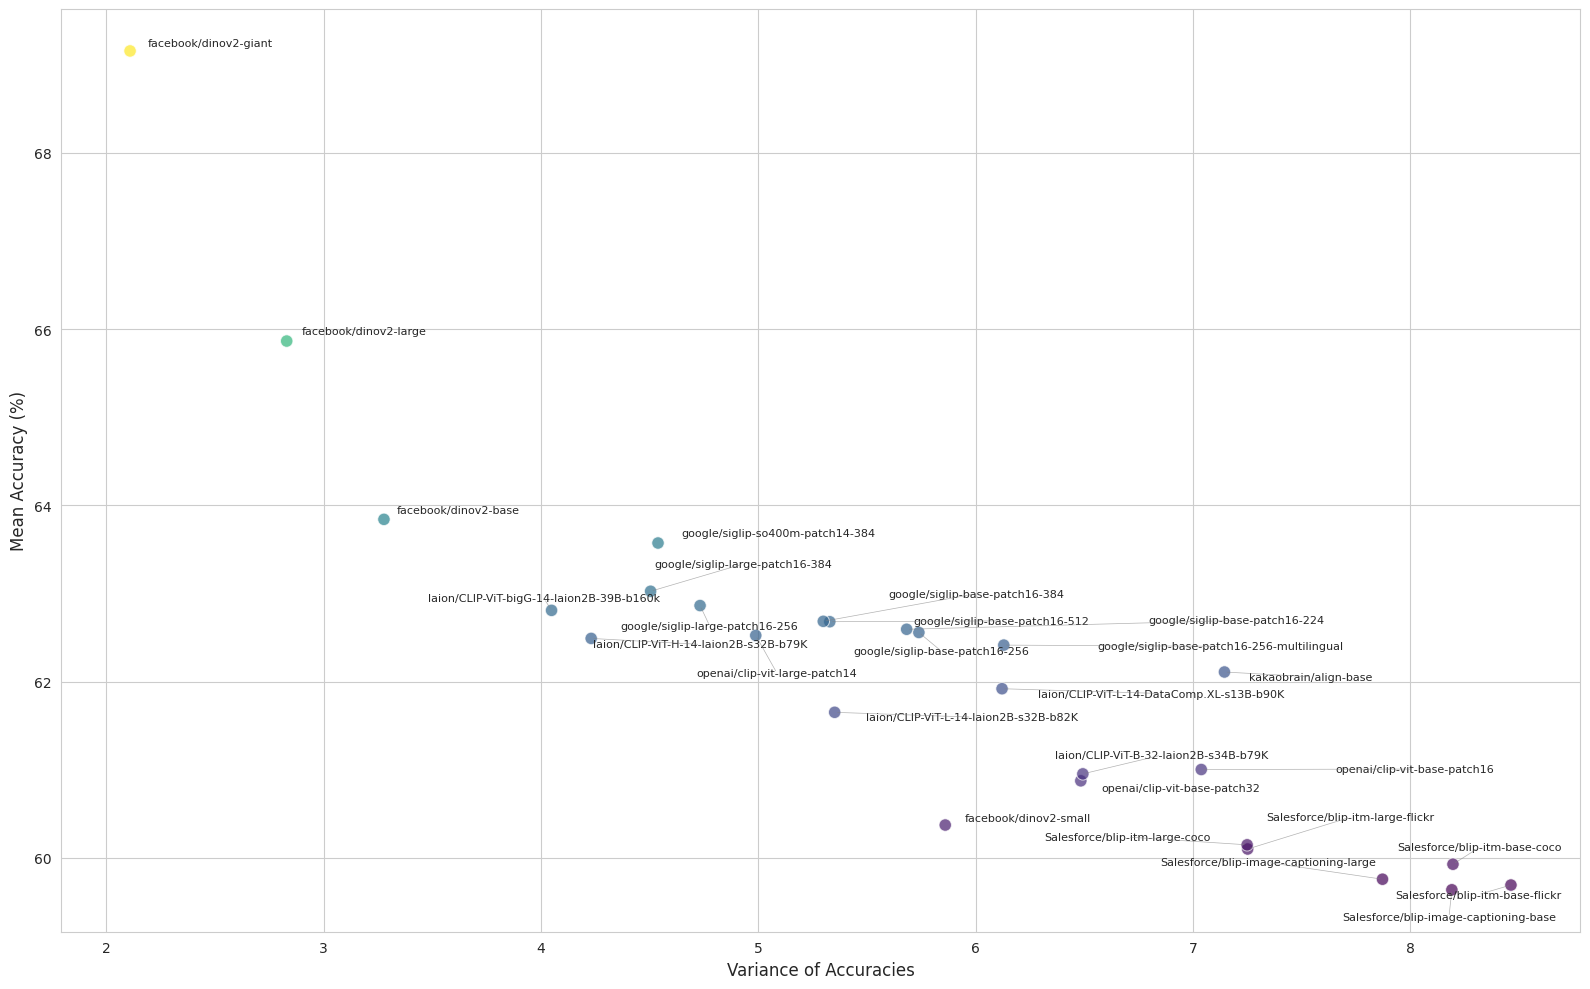

In [8]:
# Set the style
sns.set_style("whitegrid")

# Create figure with larger size for better label spacing
plt.figure(figsize=(16, 10))

# Create scatter plot with seaborn
scatter = sns.scatterplot(
    data=df,
    x='acc_var',
    y='mean_accuracy',
    alpha=0.7,
    s=80,  # Point size
    hue='mean_accuracy',  # Color by accuracy
    palette='viridis'
)

# Add labels for all models
texts = []
for i, row in df.iterrows():
    texts.append(plt.text(row['acc_var'], row['mean_accuracy'], row['model'], fontsize=8))

# Adjust text positions to minimize overlap with more iterations and force
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6, lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5),
            force_text=(0.5, 0.8),
            force_objects=(0.5, 0.5),
            lim=500)  # More iterations for better placement

# Add title and labels with better formatting
#plt.title('Model Performance: Mean Accuracy vs. Variance', fontsize=14, fontweight='bold')
plt.xlabel('Variance of Accuracies', fontsize=12)
plt.ylabel('Mean Accuracy (%)', fontsize=12)

# Remove the legend for the hue parameter (it's redundant with y-axis)
plt.legend([],[], frameon=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_8171/2100694022.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


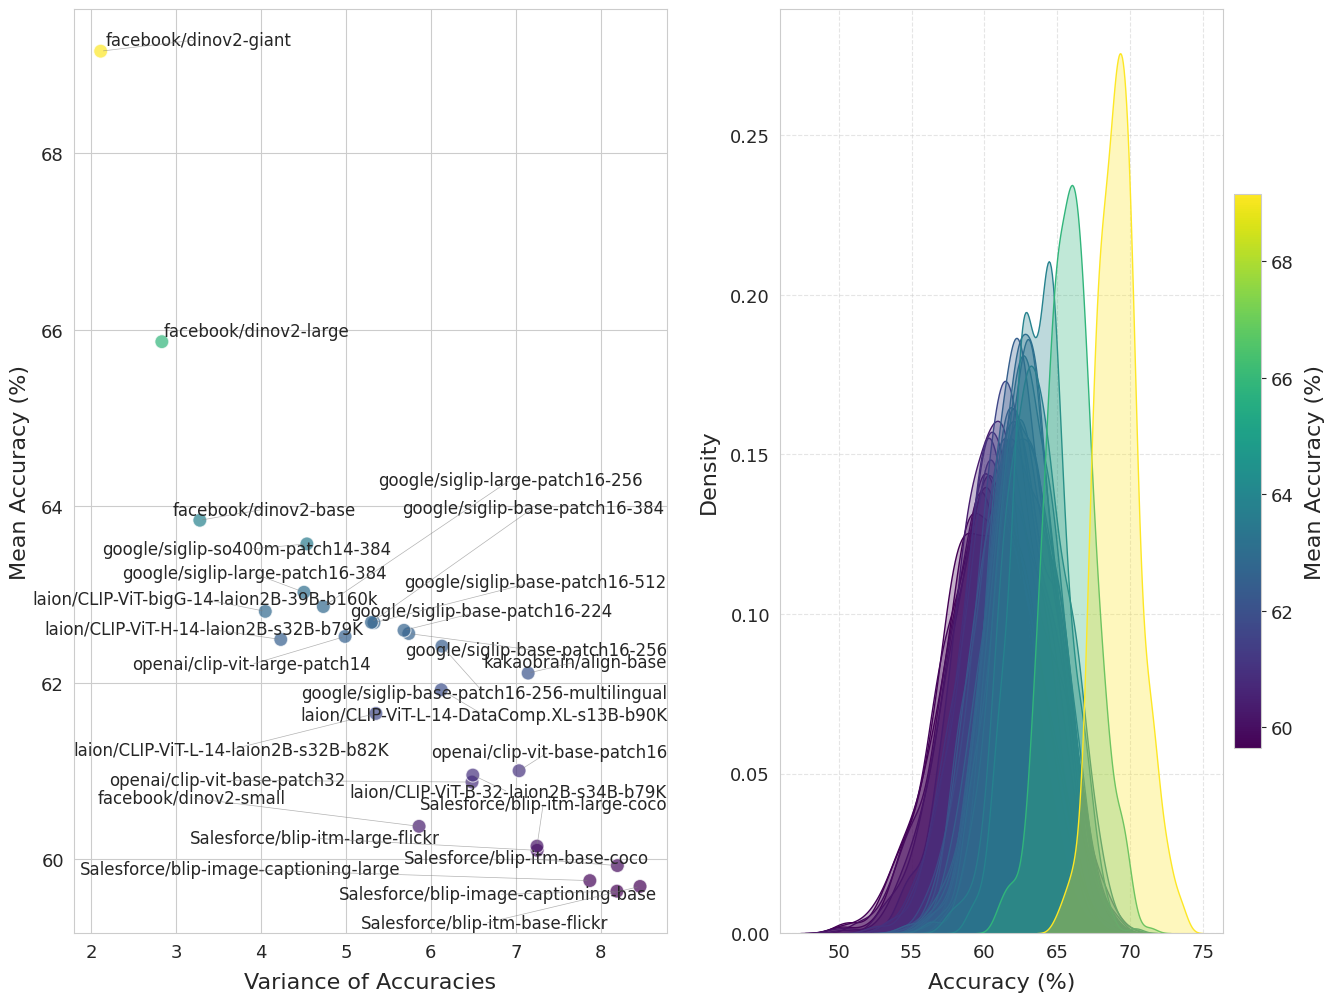

In [9]:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [1, .9], 'wspace': 0.2})

    # Set global font size for all text elements (a bit smaller than before)
    plt.rcParams.update({'font.size': 15})

    # Get colormap
    cmap = cm.viridis

    # Get min and max accuracy for normalization
    min_acc = df['mean_accuracy'].min()
    max_acc = df['mean_accuracy'].max()
    norm = plt.Normalize(min_acc, max_acc)

    # PLOT 1 (Left): Scatter plot
    sns.set_style("whitegrid")

    # Create scatter plot with seaborn on the first axis
    scatter = sns.scatterplot(
        data=df,
        x='acc_var',
        y='mean_accuracy',
        alpha=0.7,
        s=100,  # Slightly smaller point size
        hue='mean_accuracy',  # Color by accuracy
        palette='viridis',
        ax=ax1,
        legend=False  # Remove legend, handled below
    )

    # Add labels for all models
    texts = []
    for i, row in df.iterrows():
        texts.append(ax1.text(row['acc_var'], row['mean_accuracy'], row['model'], fontsize=12))

    # Adjust text positions to minimize overlap
    adjust_text(
        texts, 
        arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6, lw=0.5),
        expand_points=(1.5, 1.5),
        force_points=(0.5, 0.5),
        force_text=(0.5, 0.8),
        force_objects=(0.5, 0.5),
        lim=500,
        ax=ax1
    )

    # Add title and labels with slightly smaller font (not bold)
    #ax1.set_title('Model Performance: Mean Accuracy vs. Variance', fontsize=18)
    ax1.set_xlabel('Variance of Accuracies', fontsize=16, labelpad=8)
    ax1.set_ylabel('Mean Accuracy (%)', fontsize=16, labelpad=8)
    ax1.tick_params(axis='both', which='major', labelsize=13)

    # Remove the legend for the hue parameter (it's redundant with y-axis)
    ax1.legend([], [], frameon=False)

    # PLOT 2 (Right): KDE plot
    # Plot KDE for each model's accuracies on the second axis
    for i, row in df.iterrows():
        model_name = row['model']
        accuracies = row['accuracies']
        mean_acc = row['mean_accuracy']
        
        # Use the same normalization as in the scatter plot
        color = cmap(norm(mean_acc))
        
        # Create KDE plot with color based on mean accuracy
        sns.kdeplot(accuracies, label=model_name, fill=True, alpha=0.3, color=color, ax=ax2)

    # Add title and labels with slightly smaller font (not bold)
    #ax2.set_title('Distribution of Accuracies Across Models', fontsize=18)
    ax2.set_xlabel('Accuracy (%)', fontsize=16, labelpad=8)
    ax2.set_ylabel('Density', fontsize=16, labelpad=8)
    ax2.tick_params(axis='both', which='major', labelsize=13)
    ax2.grid(True, linestyle='--', alpha=0.5)

    # Add legend (optional, uncomment if needed)
    #ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Add colorbar to show mean accuracy scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    # Position the colorbar on the right side of the figure
    cbar = fig.colorbar(sm, ax=ax2, label='Mean Accuracy (%)', pad=0.02, shrink=0.6)
    cbar.ax.tick_params(labelsize=13)
    cbar.set_label('Mean Accuracy (%)', fontsize=16, labelpad=8)

    # Improve layout
    plt.tight_layout()

    # Save the plot as PDF
    plt.savefig('model_performance_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

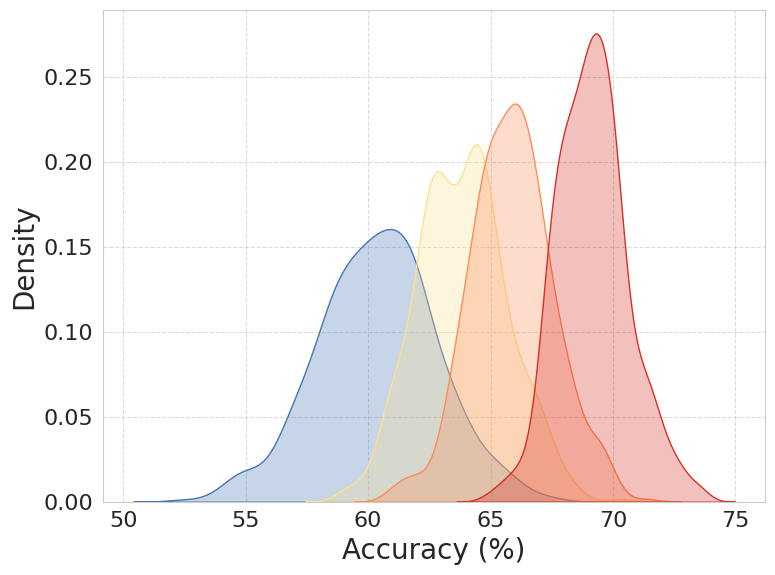

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Filter the DataFrame to only include facebook models
facebook_df = df[df['model'].str.startswith('facebook')]

# Define a mapping from model size keywords to color
size_to_color = {
    'giant': '#d73027',   # red
    'large': '#fc8d59',   # orange
    'base':  '#fee090',   # yellow
    'small': '#4575b4',   # blue
}

def get_model_size(model_name):
    # Lowercase for matching
    name = model_name.lower()
    for size in ['giant', 'large', 'base', 'small']:
        if size in name:
            return size
    return 'base'  # default if not found

plt.figure(figsize=(8, 6))
for i, row in facebook_df.iterrows():
    model_name = row['model']
    accuracies = row['accuracies']
    size = get_model_size(model_name)
    color = size_to_color.get(size, '#999999')
    sns.kdeplot(accuracies, label=f"{model_name}", fill=True, alpha=0.3, color=color)

# Custom legend order: giant, large, base, small
handles, labels = plt.gca().get_legend_handles_labels()
order = []
for size in ['giant', 'large', 'base', 'small']:
    for idx, label in enumerate(labels):
        if f"({size})" in label:
            order.append(idx)
# Add any not matched at the end
order += [i for i in range(len(labels)) if i not in order]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]

plt.xlabel('Accuracy (%)', fontsize=20)
plt.ylabel('Density', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

#plt.title('KDE of Accuracies for Facebook Models', fontsize=16)
#plt.legend(handles, labels, fontsize=10, title="Model (Size)")
plt.tight_layout()

plt.savefig("facebook_model_accuracies.pdf", format="pdf", bbox_inches="tight")
plt.show()


# Compare to Kernel Statistics

In [11]:
import glob, os
import torch
from tqdm import trange, tqdm
from pathlib import Path
import numpy as np
from taskpriors.core import compute_expectation_variance

def load_kernel_files(directory="kernels_out"):
    """
    Load all .pt files from the specified directory.
    
    Args:
        directory (str): Directory containing kernel files
        
    Returns:
        dict: Dictionary mapping filenames to loaded kernel data
    """
    kernel_files = glob.glob(os.path.join(directory, "*.pt"))
    kernels = []
    names = []
    for file_path in tqdm(kernel_files):
        try:
            kernel_data = torch.load(file_path)

            K = kernel_data['K'].cuda() # this is the cosine kernel

            n = K.shape[0]
            ones = torch.ones(n, 1, device=K.device)
            H = torch.eye(n, device=K.device) - (1/n) * (ones @ ones.T)
            kernel = H @ K @ H
            #kernel = K
            #Fro norm
            kernel = kernel / torch.linalg.norm(kernel)

            #Trace norm
            #kernel = kernel / torch.trace(kernel)
            #kernel = kernel / torch.linalg.norm(kernel, ord='nuc')
            
            kernels.append(kernel.cpu())
            file_name = Path(file_path).stem
            file_name = file_name[2:]
            
            if '__' in file_name:
                org, model = file_name.split('__', 1)
                if model.endswith('_8192'):
                    model = model[:-5]
                file_name = f"{org}/{model}"
            names.append(file_name)

        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    print(f"Loaded {len(kernels)} kernel files from {directory}")
    return kernels, names

# Load all kernel files
kernels, names = load_kernel_files()

100%|██████████| 27/27 [00:12<00:00,  2.22it/s]

Loaded 27 kernel files from kernels_out


In [12]:
T = 0.00001
expectations = np.zeros((len(kernels), len(kernels)))
variances = np.zeros((len(kernels), len(kernels)))
for i in trange(len(kernels)):
    for j in range(len(kernels)):
        K = kernels[i].cuda()
        M = kernels[j].cuda()
        expectation, variance = compute_expectation_variance(K, M, T)
        expectations[i, j] = expectation.cpu()
        variances[i, j] = variance.cpu()

100%|██████████| 27/27 [00:40<00:00,  1.51s/it]


Expectation vs Mean Accuracy: Pearson r=0.798 (p=6.3e-07), Spearman r=0.689 (p=7.15e-05)
Variance vs Accuracy Variance: Pearson r=0.772 (p=2.35e-06), Spearman r=0.760 (p=4.23e-06)


/tmp/ipykernel_8171/2480423156.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


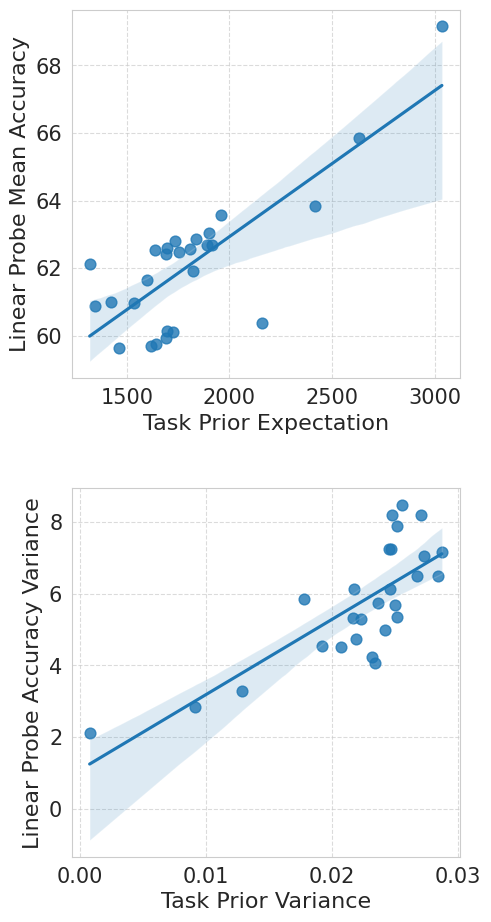

In [36]:
K_idx = 19
exps = expectations[K_idx, :]
vars = variances[K_idx, :]
df2 = df.set_index('model').loc[names]
linear_probe_mean_acc = df2['mean_accuracy'].values
linear_probe_acc_var = df2['acc_var'].values

sns.set_style("whitegrid")

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute Pearson and Spearman correlations
pearson_exp_acc, pearson_exp_acc_p = stats.pearsonr(exps, linear_probe_mean_acc)
spearman_exp_acc, spearman_exp_acc_p = stats.spearmanr(exps, linear_probe_mean_acc)

pearson_var_accvar, pearson_var_accvar_p = stats.pearsonr(vars, linear_probe_acc_var)
spearman_var_accvar, spearman_var_accvar_p = stats.spearmanr(vars, linear_probe_acc_var)

print(f"Expectation vs Mean Accuracy: Pearson r={pearson_exp_acc:.3f} (p={pearson_exp_acc_p:.3g}), Spearman r={spearman_exp_acc:.3f} (p={spearman_exp_acc_p:.3g})")
print(f"Variance vs Accuracy Variance: Pearson r={pearson_var_accvar:.3f} (p={pearson_var_accvar_p:.3g}), Spearman r={spearman_var_accvar:.3f} (p={spearman_var_accvar_p:.3g})")

# Plot both on the same figure, one on top of the other, with spacing between
fig, axes = plt.subplots(2, 1, figsize=(5, 11), gridspec_kw={'hspace': 0.3})

# Top: Expectation vs Mean Accuracy
sns.regplot(x=exps, y=linear_probe_mean_acc, ci=95, scatter_kws={'s': 60}, ax=axes[0])
axes[0].set_xlabel("Task Prior Expectation", fontsize=16)
axes[0].set_ylabel("Linear Probe Mean Accuracy", fontsize=16)
axes[0].grid(True, linestyle='--', alpha=0.7)
#axes[0].set_title(f"Expectation vs Mean Accuracy\nPearson r={pearson_exp_acc:.2f}, Spearman r={spearman_exp_acc:.2f}", fontsize=14)

# Bottom: Variance vs Accuracy Variance
sns.regplot(x=vars, y=linear_probe_acc_var, ci=95, scatter_kws={'s': 60}, ax=axes[1])
axes[1].set_xlabel("Task Prior Variance", fontsize=16)
axes[1].set_ylabel("Linear Probe Accuracy Variance", fontsize=16)
axes[1].grid(True, linestyle='--', alpha=0.7)
#axes[1].set_title(f"Variance vs Accuracy Variance\nPearson r={pearson_var_accvar:.2f}, Spearman r={spearman_var_accvar:.2f}", fontsize=14)

plt.tight_layout()

plt.savefig("expectation_variance_vs_accuracy_linear_probes.pdf", bbox_inches='tight')


plt.show()
